In [1]:
#Import required libaries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as si


In [2]:
Eth_USD = yf.download("Eth-USD", start="2020-01-01", end="2022-01-01")


[*********************100%***********************]  1 of 1 completed


In [3]:
Eth_USD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353


In [4]:
Eth_USD.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-28,4037.538086,4037.538086,3769.280029,3800.893066,3800.893066,17299472803
2021-12-29,3797.436279,3827.981934,3612.795898,3628.531738,3628.531738,15722555672
2021-12-30,3632.219727,3767.559814,3595.204834,3713.852051,3713.852051,12925377999
2021-12-31,3713.430176,3807.288818,3636.869873,3682.632812,3682.632812,14157285268
2022-01-01,3683.047119,3769.917969,3682.286621,3769.697021,3769.697021,9776191466


In [5]:
adj_close =  Eth_USD['Adj Close'] #Take only Adj Close 
close = Eth_USD['Close']

In [6]:
Eth_USD[['Adj Close']].head()

,Adj Close
Date,
2020-01-01,130.802002
2020-01-02,127.410179
2020-01-03,134.171707
2020-01-04,135.069366
2020-01-05,136.276779


In [7]:
data = Eth_USD[['Adj Close']]
data.head()

,Adj Close
Date,
2020-01-01,130.802002
2020-01-02,127.410179
2020-01-03,134.171707
2020-01-04,135.069366
2020-01-05,136.276779


In [8]:
data.describe().round(2)

,Adj Close
count,732.00
mean,1544.30
std,1437.03
min,110.61
25%,244.99
50%,744.71
75%,2636.04
max,4812.09


In [9]:
Eth_USD['SMA1'] = Eth_USD['Adj Close'].rolling(window=20).mean()
Eth_USD['SMA2'] = Eth_USD['Adj Close'].rolling(window=60).mean()
Eth_USD[['Adj Close', 'SMA1', 'SMA2']].tail()

,Adj Close,SMA1,SMA2
Date,,,
2021-12-28,3800.893066,3980.596741,4266.659770
2021-12-29,3628.531738,3956.032532,4255.041125
2021-12-30,3713.852051,3946.300330,4245.470756
2021-12-31,3682.632812,3926.209351,4234.770854
2022-01-01,3769.697021,3907.971545,4221.185824


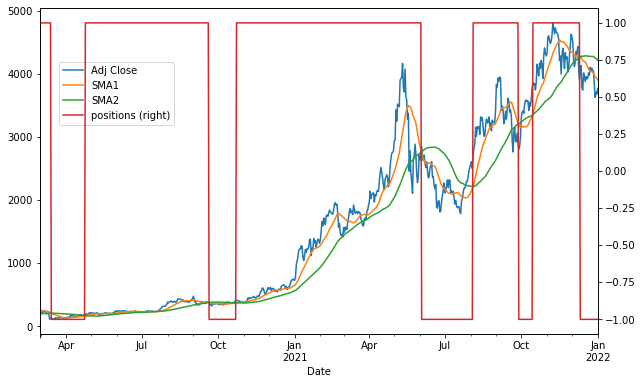

In [10]:
Eth_USD.dropna(inplace=True)
Eth_USD['positions'] = np.where(Eth_USD['SMA1'] > Eth_USD['SMA2'],1,-1)
ax = Eth_USD[['Adj Close', 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

array([<AxesSubplot:xlabel='Date'>], dtype=object)

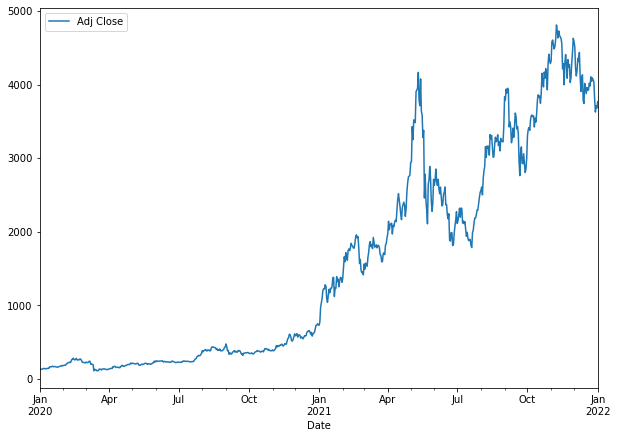

In [11]:
data.plot(figsize=(10, 7), subplots=True)

array([<AxesSubplot:xlabel='Date'>], dtype=object)

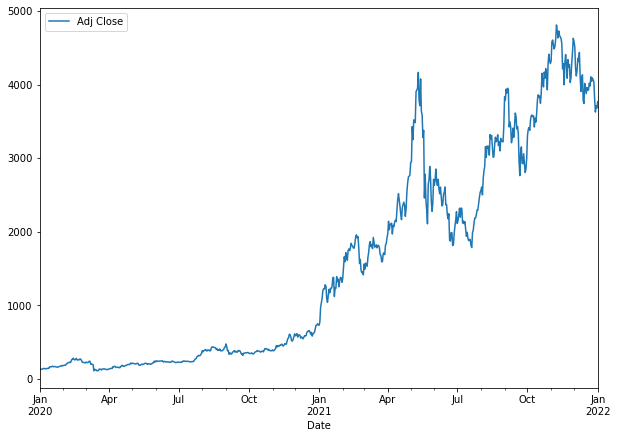

In [12]:
data.plot(figsize=(10, 7), subplots=True)

In [14]:
log_return = np.log(Eth_USD['Adj Close'] / Eth_USD['Adj Close'].shift(1))

In [15]:
vol = log_return.std()    #daily volatility
print('The daily volatility is', round(vol*100,2), '%')

The daily volatility is 5.52 %


In [16]:
Eth_adj_close = pd.DataFrame(adj_close.dropna())

In [17]:
normal_return = Eth_adj_close.pct_change()
normal_return.head()

,Adj Close
Date,
2020-01-01,NaN
2020-01-02,-0.025931
2020-01-03,0.053069
2020-01-04,0.006690
2020-01-05,0.008939


In [18]:
dfnr = pd.DataFrame(normal_return, columns = ['Adj Close']) 
nr = dfnr.mean() * 730
nv = dfnr.std() * (730 ** 0.5)
print('The annualized normal return is %.8f and its annualized volatility is %.8f' % (nr,nv))

The annualized normal return is 4.41395633 and its annualized volatility is 1.42548444


In [19]:
log_rets = np.log(Eth_adj_close / Eth_adj_close.shift(1))
log_rets.head().round(4)

,Adj Close
Date,
2020-01-01,NaN
2020-01-02,-0.0263
2020-01-03,0.0517
2020-01-04,0.0067
2020-01-05,0.0089


In [20]:
dflr = pd.DataFrame(log_rets, columns = ['Adj Close']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f ' % (lr,lv))

The annualized log return is 3.36566307 and its annualized volatility is 1.46777007 


In [21]:
log_return_last_3months=log_rets[-90:]
log_return_last_3months

,Adj Close
Date,
2021-10-04,-0.011258
2021-10-05,0.040138
2021-10-06,0.017480
2021-10-07,0.002068
2021-10-08,-0.006772
...,...
2021-12-28,-0.060401
2021-12-29,-0.046408
2021-12-30,0.023242


In [22]:
dflr1 = pd.DataFrame(log_return_last_3months, columns = ['Adj Close']) 
lr1 = dflr1.mean() * len(dflr)
lv1 = dflr1.std() * (len(dflr) ** 0.5)
print('The annualized log return (for the last 3 months) is %.8f and its annualized volatility is %.8f' % (lr1,lv1))

The annualized log return (for the last 3 months) is 0.79571756 and its annualized volatility is 0.97016213


In [23]:
log_return_mid_year=log_rets[150:-90]
log_return_mid_year

,Adj Close
Date,
2020-05-30,0.093673
2020-05-31,-0.048052
2020-06-01,0.067042
2020-06-02,-0.040371
2020-06-03,0.028919
...,...
2021-09-29,0.016199
2021-09-30,0.050750
2021-10-01,0.097026


In [24]:
dflr2 = pd.DataFrame(log_return_mid_year, columns = ['Adj Close']) 
lr2 = dflr2.mean() * len(dflr)
lv2 = dflr2.std() * (len(dflr) ** 0.5)
print('The mid year annualized  log return (for Mar 1 - Sep 1) is %.8f and its annualized volatility is %.8f' % (lr2,lv2))

The mid year annualized  log return (for Mar 1 - Sep 1) is 4.07691891 and its annualized volatility is 1.42801840


In [25]:
all_lv=lv,lv2,lv1
all_lv1 = pd.DataFrame (all_lv)

In [26]:
lv_avg=all_lv1 ['Adj Close'].mean()
print ('The combine Annualized Log volatility =', lv_avg)

The combine Annualized Log volatility = 1.2886501998596207


In [27]:
all_lr = lr,lr2,lr1
all_lr1 = pd.DataFrame (all_lr)

In [28]:
lr_avg=all_lr1 ['Adj Close'].mean()
print ('The combine Annualized Log Return =', lr_avg)

The combine Annualized Log Return = 2.746099845849349


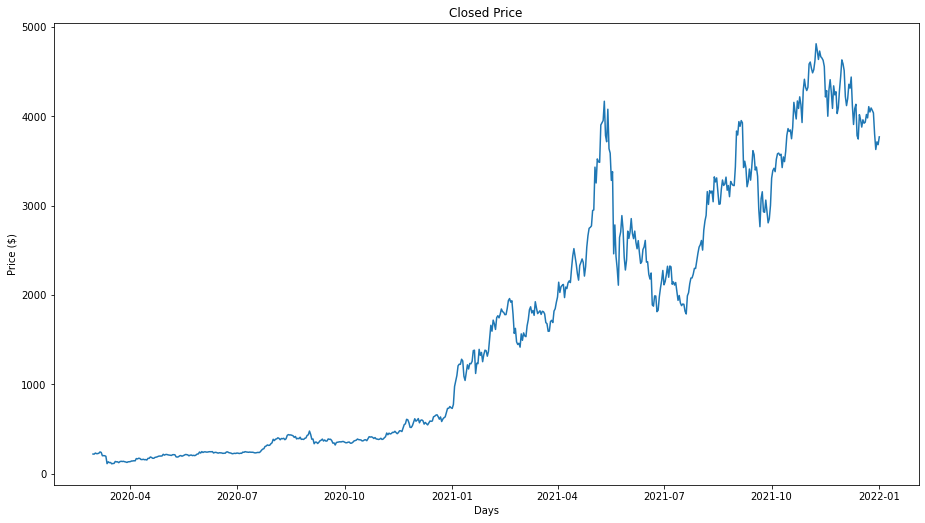

In [29]:
fig = plt.figure()
fig.set_size_inches(15.5, 8.5, forward=True)
plt.plot(Eth_USD['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

Text(0.5, 1.0, 'Log Return')

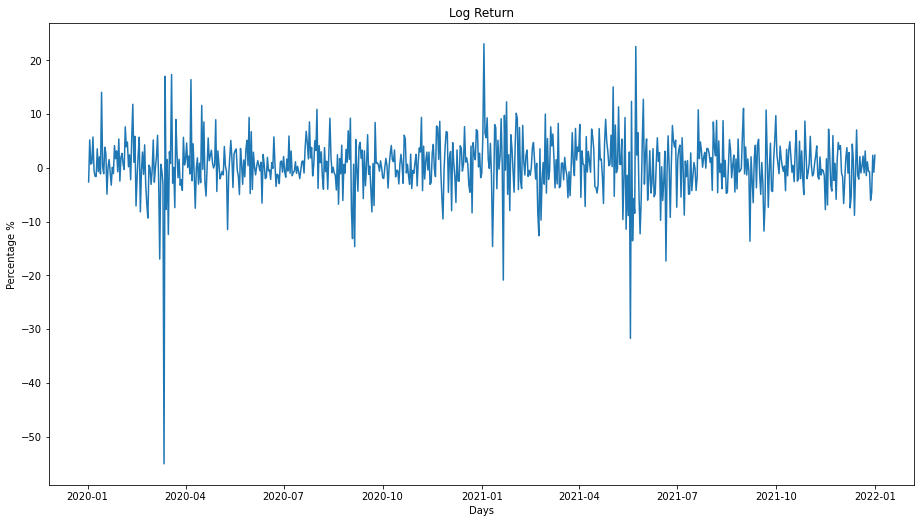

In [30]:
fig = plt.figure()
fig.set_size_inches(15.5, 8.5, forward=True)
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage %')
plt.title('Log Return')

Text(0.5, 1.0, 'Eth-USD Average annualized volatility:128.87%')

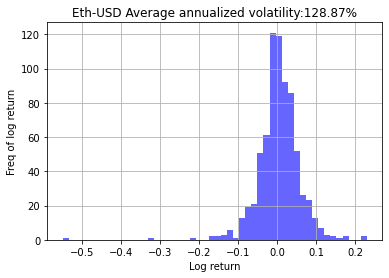

In [31]:
str_vol = str(round(lv_avg, 4)*100)
fig, ax = plt.subplots()
dflr['Adj Close'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Eth-USD Average annualized volatility:'+ str_vol + '%')

In [32]:
S = Eth_USD['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 3769.7


In [72]:
 S0 = 3769.7             # spot stock price
K = 85                 # strike
T = 1/52                # maturity 
r = 0.0169              # risk free rate 
sig = 1.53              # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps  
payoff = "put"  

In [73]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 


In [74]:
print('up factor', u)

up factor 1.111917955996825


In [75]:
print('down factor' , d)

down factor 0.8993469298762321


In [76]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [77]:
S

array([[3769.7       , 4191.59711872, 4660.71210061, 5182.3294724 ,
        5762.32519425],
       [   0.        , 3390.26812155, 3769.7       , 4191.59711872,
        4660.71210061],
       [   0.        ,    0.        , 3049.02722658, 3390.26812155,
        3769.7       ],
       [   0.        ,    0.        ,    0.        , 2742.13327533,
        3049.02722658],
       [   0.        ,    0.        ,    0.        ,    0.        ,
        2466.12914248]])

In [78]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.47388548318664725

In [79]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [80]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [81]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [82]:
print('European ' + payoff, str( V[0,0]))

European put 0.0


In [54]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European call', str(p))

European call 85.0


In [83]:
def mcs_simulation_np(n,p):
    M = n
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [84]:
T = 1/52
r = 0.0169
sigma = 1.53
S0 = 3769.7
K = 85

In [85]:
S = mcs_simulation_np(100,10000)

In [86]:
S = np.transpose(S)
S

array([[3769.7       , 3733.11543075, 3632.65983129, ..., 2984.57295147,
        2966.77216648, 2868.45398742],
       [3769.7       , 3774.70803572, 3701.19331617, ..., 4174.23129298,
        3981.58181389, 3965.49035259],
       [3769.7       , 3708.57955082, 3661.78831835, ..., 2846.93239712,
        2836.41449086, 2832.78069914],
       ...,
       [3769.7       , 3732.51438524, 3808.28971108, ..., 4895.48470434,
        4986.05535078, 4950.09477778],
       [3769.7       , 3772.89220158, 3870.26460688, ..., 3523.57657444,
        3572.05365024, 3596.11085241],
       [3769.7       , 3770.79668756, 3681.41719118, ..., 3212.67223476,
        3328.45946502, 3354.82781962]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

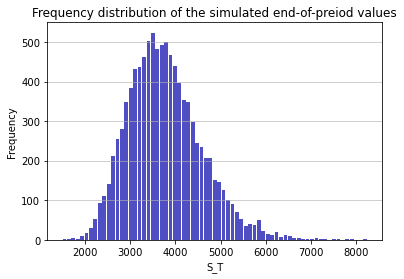

In [87]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')


In [88]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 0.0


In [90]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta


In [97]:
delta(3769, 3400, 1/24, 1.69, 0.0163, 0.86, 'put') # value of delta


-0.14177139338784694

In [98]:
S = np.linspace(20,150,51)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 3400, 1/52, 0.0169, 0, 1.53, 'put')

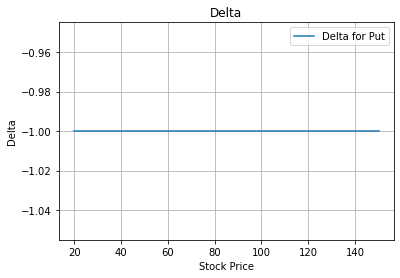

In [99]:
fig = plt.figure()
plt.plot(S, Delta_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

In [100]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 3400, T[i], 0.0169, 0, 1.53, 'put')



C:\Users\akhil\AppData\Local\Temp/ipykernel_7892/2588004393.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


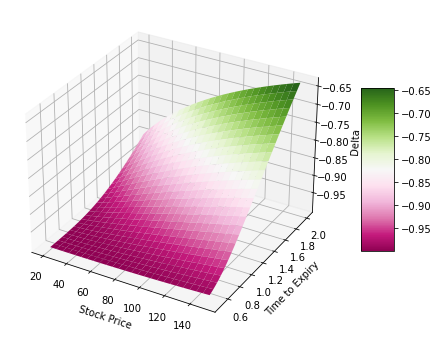

In [101]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.PiYG, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [103]:
d = delta(3769, 3400, 1/52, 0.0169, 0, 1.53, 'put')
print('The value of Delta is', d.round(4),'.','If the cypto eth price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')



The value of Delta is -0.2765 . If the cypto eth price increase 1 dollar, then the value of the option will increase $ -0.2765 .


In [104]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [105]:
gamma(3769, 3400, 1/24, 1.69, 0.0163, 0.86, 'put') # value of gamma


0.0003392110250605452

In [106]:
S = np.linspace(20,150,51)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 3400, 1/52, 0.0169, 0, 1.53, 'put')

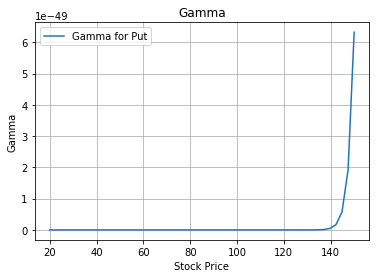

In [107]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [108]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 3400, T[i], 0.0169, 0, 1.53, 'put')


C:\Users\akhil\AppData\Local\Temp/ipykernel_7892/540855653.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


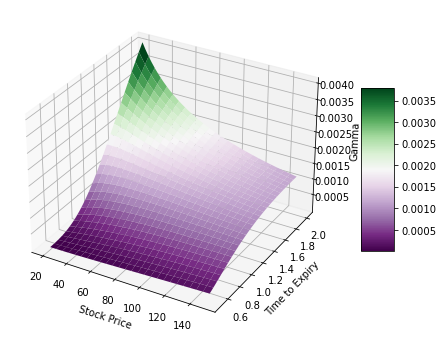

In [109]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.PRGn, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);


In [110]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [111]:
theta(3769, 3400, 1/24, 1.69, 0.0163, 0.86, 'put') # value of theta


2764.0229967137357

In [112]:
T = np.linspace(0.25,7,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(3769, 28, T[i], 0.0169, 0, 1.53, 'put')



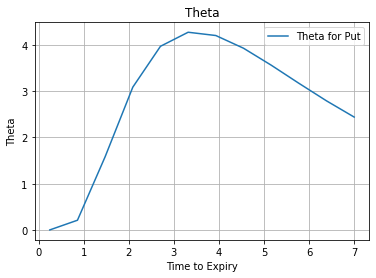

In [113]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [114]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 3400, T[i], 0.0169, 0, 1.53, 'put')



C:\Users\akhil\AppData\Local\Temp/ipykernel_7892/2273786227.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


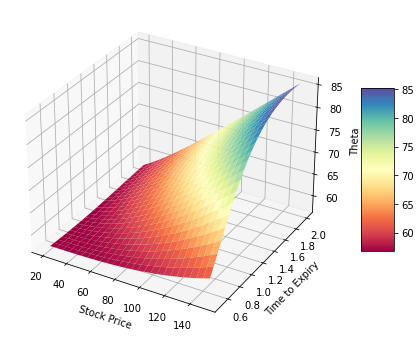

In [115]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.Spectral, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [116]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho


In [117]:
rho(3769, 3400, 1/24, 1.69, 0.0163, 0.86, 'put') # value of rho


-24.428225548995286

In [118]:
r = np.linspace(0,0.8,51)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(3769, 3400, 1/52, r[i], 0, 1.53, 'put')


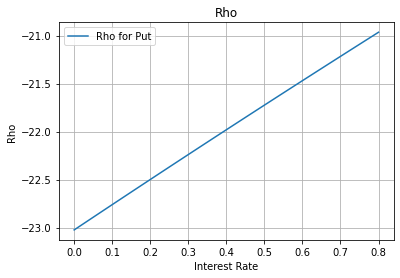

In [119]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

In [120]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 3400, T[i], 0.0169, 0, 1.53, 'put')

C:\Users\akhil\AppData\Local\Temp/ipykernel_7892/2476565794.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


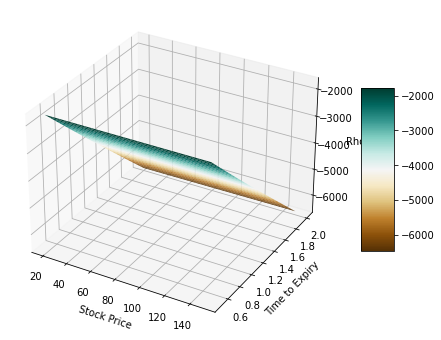

In [121]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.BrBG, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [122]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [123]:
vega(3769, 3400, 1/24, 1.69, 0.0163, 0.86, 'put') # value of vega


172.66703987091577

In [124]:
vol = np.linspace(0.1,2,21)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(3769, 3400, 1/52, 0.0169, 0, vol[i], 'put')


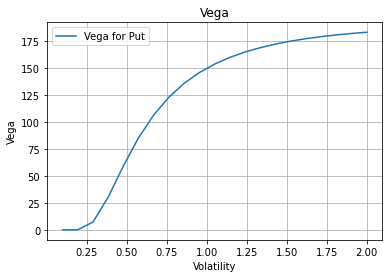

In [125]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

In [126]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 3400, T[i], 0.0169, 0, 1.53, 'put')


C:\Users\akhil\AppData\Local\Temp/ipykernel_7892/1780992506.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


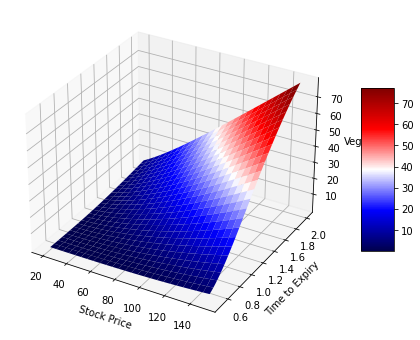

In [127]:

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.seismic, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [128]:
v = vega(3769, 3400, 1/52, 0.0169, 0, 1.53, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')



The value of Vega is 174.8698 . If the volatility increases 1%, then the value of the option will increase $ 1.748698 .


In [129]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed


In [130]:
speed(3769, 3400, 1/24, 1.69, 0.0163, 0.86, 'put') # value of speed


-1.3055402771481895e-07

In [131]:
S = np.linspace(20,150,51)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 3400, 1/52, 0.0169, 0, 1.53, 'put')


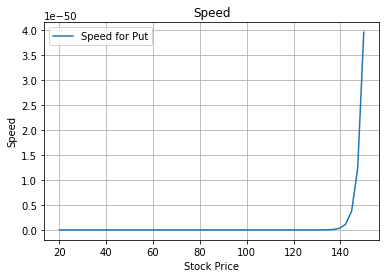

In [132]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])


In [133]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 3400, T[i], 0.0169, 0, 1.53, 'put')


C:\Users\akhil\AppData\Local\Temp/ipykernel_7892/3245693921.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


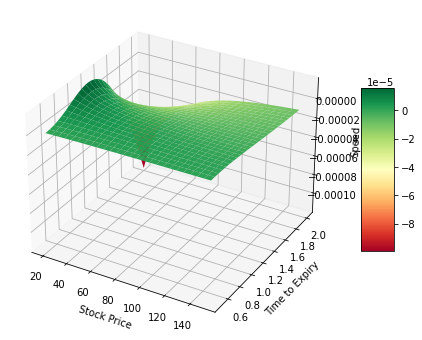

In [134]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.RdYlGn, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [135]:
#END
